In [16]:
#Step 1: Import modules

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

from sklearn.svm import SVC

%matplotlib inline

In [7]:
# Step 2: Import database
dataset = pd.read_csv('ex2data2.txt', header = None, names = ['test 1', 'test 2', 'result'])
dataset.head()

,test 1,test 2,result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [10]:
pos = dataset['result'] ==1
neg = dataset['result'] ==0
dataset[neg].head()

,test 1,test 2,result
58,0.18376,0.93348,0
59,0.22408,0.77997,0
60,0.29896,0.61915,0
61,0.50634,0.75804,0
62,0.61578,0.72880,0


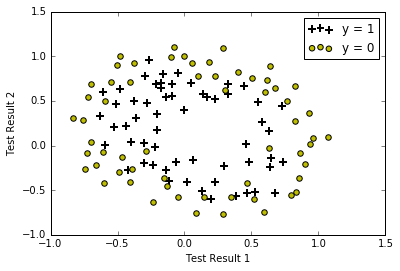

In [14]:
# Step 3: Visualize Data
plt.scatter(dataset[pos]['test 1'],dataset[pos]['test 2'], marker = '+', c = 'k', linewidth = 2, s=60, label='y = 1')
plt.scatter(dataset[neg]['test 1'],dataset[neg]['test 2'], c = 'y', linewidth = 1, s=30, label = 'y = 0')
plt.xlabel('Test Result 1')
plt.ylabel('Test Result 2')
plt.legend()

In [18]:
# Step 4: manipulate data for use. 
X = dataset.drop(['result'], axis=1)
Y = dataset['result']

X = X.values # 117 x 2 array
Y = Y.values # 1 x 117 array

In [25]:
# Step 5: Fit with Scikit-learn Support Vector Machine
regr = SVC(kernel = 'rbf', gamma=.7, C=1)
regr.fit(X,Y) #magic


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

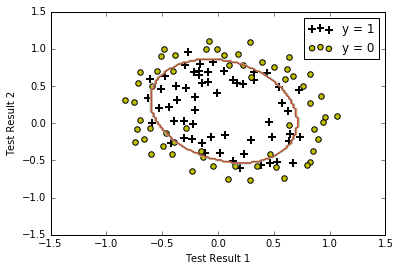

In [26]:
# Step 6: Visualize with decision boundary
plt.scatter(dataset[pos]['test 1'],dataset[pos]['test 2'], marker = '+', c = 'k', linewidth = 2, s=60, label='y = 1')
plt.scatter(dataset[neg]['test 1'],dataset[neg]['test 2'], c = 'y', linewidth = 1, s=30, label = 'y = 0')
plt.xlabel('Test Result 1')
plt.ylabel('Test Result 2')
plt.legend()
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = regr.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)